In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [7]:
# read LRG data arrays

data_raLRG = np.load('/Users/mtownsend/anaconda/Data/ra_LRG.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

data_decLRG = np.load('/Users/mtownsend/anaconda/Data/dec_LRG.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

data_zLRG = np.load('/Users/mtownsend/anaconda/Data/z_LRG.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

data_gmagLRG = np.load('/Users/mtownsend/anaconda/Data/gmag_LRG.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

data_rmagLRG = np.load('/Users/mtownsend/anaconda/Data/rmag_LRG.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

data_zmagLRG = np.load('/Users/mtownsend/anaconda/Data/zmag_LRG.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)
print(zmagLRG.min())
print(zmagLRG.max())

print('----')

data_grcolorLRG = np.load('/Users/mtownsend/anaconda/Data/grcolor_LRG.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

data_rzcolorLRG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_LRG.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)


(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
----
(1823,)
15.818878
21.957382
----
(1823,)
----
(1823,)


In [8]:
# read BKG data arrays

data_raBKG = np.load('/Users/mtownsend/anaconda/Data/ra_BKG_v2.npz')
raBKG = data_raBKG['ra_BKG']
print(raBKG.shape)

print('----')

data_decBKG = np.load('/Users/mtownsend/anaconda/Data/dec_BKG_v2.npz')
decBKG = data_decBKG['dec_BKG']
print(decBKG.shape)

print('----')

data_gmagBKG = np.load('/Users/mtownsend/anaconda/Data/gmag_BKG_v2.npz')
gmagBKG = data_gmagBKG['gmag_BKG']
print(gmagBKG.shape)

print('----')

data_rmagBKG = np.load('/Users/mtownsend/anaconda/Data/rmag_BKG_v2.npz')
rmagBKG = data_rmagBKG['rmag_BKG']
print(rmagBKG.shape)

print('----')

data_zmagBKG = np.load('/Users/mtownsend/anaconda/Data/zmag_BKG_v2.npz')
zmagBKG = data_zmagBKG['zmag_BKG']
print(zmagBKG.shape)

print('----')


data_grcolorBKG = np.load('/Users/mtownsend/anaconda/Data/grcolor_BKG_v2.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']
print(grcolorBKG.shape)

print('----')

data_rzcolorBKG = np.load('/Users/mtownsend/anaconda/Data/rzcolor_BKG_v2.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']
print(rzcolorBKG.shape)


(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)
----
(1294476,)


In [9]:
# # save combined LRG and BKG lists

# create combined LRG-BKG lists

ra_total = np.concatenate([raLRG, raBKG])
dec_total = np.concatenate([decLRG, decBKG])
gmag_total = np.concatenate([gmagLRG, gmagBKG])
rmag_total = np.concatenate([rmagLRG, rmagBKG])
zmag_total = np.concatenate([zmagLRG, zmagBKG])
rzcolor_total = np.concatenate([rzcolorLRG, rzcolorBKG])
grcolor_total = np.concatenate([grcolorLRG, grcolorBKG])

print(len(ra_total))


# # np.savez('/Users/mtownsend/Documents/LRG_Data/ra_total.npz', ra=ra)
# # print(ra.shape)
# data_ra = np.load('/Users/mtownsend/Documents/LRG_Data/ra_total.npz')
# ra_total = data_ra['ra']
# print(ra_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/dec_total.npz', dec=dec)
# # print(dec.shape)
# data_dec = np.load('/Users/mtownsend/Documents/LRG_Data/dec_total.npz')
# dec_total = data_dec['dec']
# print(dec_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz', gmag=gmag)
# # print(gmag.shape)
# data_gmag = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_total.npz')
# gmag_total = data_gmag['gmag']
# print(gmag_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz', rmag=rmag)
# # print(rmag.shape)
# data_rmag = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_total.npz')
# rmag_total = data_rmag['rmag']
# print(rmag_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz', zmag=zmag)
# # print(zmag.shape)
# data_zmag = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_total.npz')
# zmag_total = data_zmag['zmag']
# print(zmag_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz', grcolor=grcolor)
# # print(grcolor.shape)
# data_grcolor = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_total.npz')
# grcolor_total = data_grcolor['grcolor']
# print(grcolor_total.shape)

# print('----')

# # np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz', rzcolor=rzcolor)
# # print(rzcolor.shape)
# data_rzcolor = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_total.npz')
# rzcolor_total = data_rzcolor['rzcolor']
# print(rzcolor_total.shape)

# print(rzcolor_total[0:10])
# print(rzcolor_total[0])
# print(rzcolor_total[5])

1296299


In [10]:
DTT_Gyr, age_Gyr, zage_Gyr, DCMR_Mpc, DCMR_Gyr, DA_Mpc, DA_Gyr, kpc_DA, DL_Mpc, DL_Gyr, V_Gpc = cosmoCalcfunc(zLRG)

print("end cosmoCalc")


end cosmoCalc


In [12]:
rz_edges = np.array([-1.8027077, -1.5527076721191406, -1.3027076721191406, -1.0527076721191406, -0.8027076721191406, -0.5527076721191406, -0.3027076721191406, -0.052707672119140625, 0.19729232788085938, 0.4472923278808594, 0.6972923278808594, 0.9472923278808594, 1.1972923278808594, 1.4472923278808594, 1.6972923278808594, 1.9472923278808594, 2.1972923278808594, 2.4472923278808594, 2.6972923278808594, 2.9472923278808594, 3.1972923278808594, 3.4472923278808594, 3.6972923278808594, 3.9472923278808594, 4.197292327880859, 4.447292327880859, 4.697292327880859, 4.947292327880859, 5.197292327880859, 5.447292327880859, 5.697292327880859, 5.947292327880859, 6.197292327880859, 6.447292327880859, 6.697292327880859, 6.947292327880859, 7.197292327880859, 7.447292327880859, 7.697292327880859, 7.947292327880859, 8.19729232788086, 8.44729232788086, 8.69729232788086, 8.94729232788086, 9.19729232788086, 9.44729232788086, 9.69729232788086, 9.94729232788086, 10.19729232788086, 10.44729232788086])
# zmag_edges = np.array([13.22509, 14.025090026855466, 15.025090026855462, 16.02509002685546, 17.025090026855455, 18.02509002685545, 19.025090026855448, 20.025090026855445, 21.025, 22.025090026855437, 23.025090026855434])
gr_edges = np.array([-6.5846786, -6.234678649902344, -5.8846786499023445, -5.534678649902345, -5.184678649902345, -4.8346786499023455, -4.484678649902346, -4.134678649902346, -3.784678649902346, -3.434678649902346, -3.084678649902346, -2.734678649902346, -2.384678649902346, -2.0346786499023457, -1.6846786499023456, -1.3346786499023455, -0.9846786499023455, -0.6346786499023456, -0.2846786499023456, 0.06532135009765438, 0.41532135009765436, 0.7653213500976543, 1.1153213500976542, 1.4653213500976543, 1.8153213500976544, 2.1653213500976545, 2.5153213500976546, 2.8653213500976547, 3.2153213500976547, 3.565321350097655, 3.915321350097655, 4.265321350097655, 4.615321350097655, 4.965321350097654, 5.315321350097654, 5.665321350097654, 6.015321350097653, 6.365321350097653, 6.7153213500976525, 7.065321350097652, 7.415321350097652, 7.7653213500976515, 8.115321350097652, 8.465321350097652, 8.815321350097651, 9.165321350097651, 9.51532135009765, 9.86532135009765, 10.21532135009765, 10.56532135009765])

# rzinit = -1.8027077
# rzfin = 10.44729232788086
# rz_interval = 0.5
# rz_num = (rzfin-rzinit)/rz_interval
# rz_edges, step = np.linspace(rzinit, rzfin, num=int(rz_num), retstep=True)
# print(len(rz_edges))

# grinit = -6.5846786
# grfin = 10.56532135009765
# gr_interval = 0.5
# gr_num = (grfin-grinit)/gr_interval
# gr_edges, step = np.linspace(grinit, grfin, num=int(gr_num), retstep=True)
# print(len(gr_edges))

zmaginit = 13.
zmagfin = 23.
interval = 0.2
zmag_num = (zmagfin-zmaginit)/interval
zmag_edges, step = np.linspace(zmaginit, zmagfin, num=int(zmag_num), retstep=True)
print(type(zmag_edges))

edges = np.array([rz_edges, gr_edges, zmag_edges])
print(edges.shape)

H1, nouse_edges = np.histogramdd((rzcolor_total, grcolor_total, zmag_total), bins=(rz_edges, gr_edges, zmag_edges), density=False)

print(H1.shape)



<class 'numpy.ndarray'>
(3, 50)
(49, 49, 49)


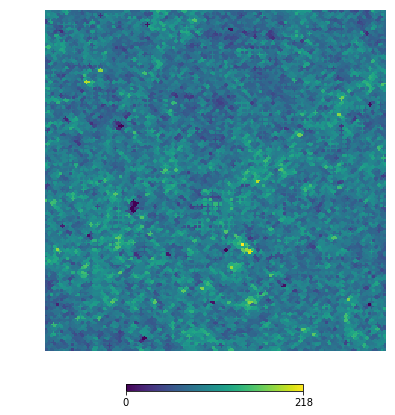

length phi:  1296299


In [7]:
# Make HEALPix map using just RA/Dec; end up with a density plot

nside = 1024
npixel = hp.nside2npix(nside)

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra_total)):
    theta.append(np.radians(90. - dec_total[i]))
    phi.append(np.radians(ra_total[i]))
    
m = hp.ang2pix(nside, theta, phi)
map_ = np.bincount(m, minlength=npixel)
hp.gnomview(map_, xsize=225, rot=(-116.5, 9), flip='geo', cmap='viridis', notext=True, title="")
# plt.rcParams.update({'font.size':20})
# plt.savefig('/Users/mtownsend/Desktop/survey-density.jpg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/HEALPix-survey-density-v2.pdf')
plt.show()

print('length phi: ', len(phi))

# Convert angles theta and phi to pixel numbers

pixnums = hp.ang2pix(nside, theta, phi, nest=True)

In [8]:
distance = 0.5 # must be in Mpc

distance_kpc, near, gal_tree, dist, index, nn1 = nearNeighbor(distance, kpc_DA, raLRG, decLRG, raBKG, decBKG, zmagLRG, zmagBKG, rzcolorLRG, rzcolorBKG, grcolorLRG, grcolorBKG, nouse_edges)

print('end nearNeighbor')

end nearNeighbor


In [14]:
print(index[0])

index_arr = np.array(index)

data_near_index35 = index_arr[np.where((zLRG >= 0.2) & (zLRG < 0.35))]
data_near_index05 = index_arr[np.where((zLRG >= 0.35) & (zLRG < 0.5))]
data_near_index65 = index_arr[np.where((zLRG >= 0.5) & (zLRG <= 0.65))]

print(data_near_index35.shape)
print(data_near_index05.shape)
print(data_near_index65.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/near_index_low-EDR.npz', index_total=index_arr, data_near_index35=data_near_index35, data_near_index05=data_near_index05, data_near_index65=data_near_index65)
# data_near = np.load('/Users/mtownsend/Documents/LRG_Data/near_index-EDR.npz')



[340819, 340820, 340835, 340789, 340723, 340759, 340760, 340788, 340790, 340714, 340705, 340687, 340711, 340704, 340718, 340719, 340747, 340750, 340748, 340713, 340740, 340731, 340764, 340767, 340801, 340773, 340802, 340795, 340772, 340803, 340799, 340774, 340775, 340786, 340778, 340798, 340779, 340800, 340826, 340843, 340841, 340844, 340827, 340831, 343751, 343825, 343838, 343892, 343926, 343785, 343834, 343960, 343849, 343807, 343885, 343879, 340852, 340857, 343861, 343860, 343961, 343962, 343949, 343811, 343736, 343858, 343719, 343780, 343737, 343720, 343738, 343769, 343891, 343898, 340865, 343796, 340856, 343828, 340868, 343837, 343921, 343950, 343931, 343835, 343866, 343934, 343932, 343867, 343865, 343930, 343933, 343748, 343814, 343978, 343733, 343863, 343732, 343884, 1489, 343830, 343844, 343740, 343739, 343731, 343868, 343741, 343856, 343826, 343893, 343894, 343895, 343742, 343973, 343987, 343982, 343758, 343956, 343730, 343806, 343763, 343734, 343979, 343735, 343997, 343768, 3

In [12]:
# divvy up by redshift

near_arr = np.array(near)

data_near35 = near_arr[np.where((zLRG >= 0.2) & (zLRG < 0.35))]
data_near05 = near_arr[np.where((zLRG >= 0.35) & (zLRG < 0.5))]
data_near65 = near_arr[np.where((zLRG >= 0.5) & (zLRG <= 0.65))]

print(data_near35.shape)
print(data_near05.shape)
print(data_near65.shape)

# save near arrays

np.savez('/Users/mtownsend/Documents/LRG_Data/data_near-EDR.npz', near_total=near_arr, data_near35=data_near35, data_near05=data_near05, data_near65=data_near65)
data_near = np.load('/Users/mtownsend/Documents/LRG_Data/data_near-EDR.npz')
near_total = data_near['near_total']
near35 = data_near['data_near35']
near05 = data_near['data_near05']
near65 = data_near['data_near65']

print(near35.shape)
print(near05.shape)
print(near65.shape)


(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)


In [38]:
def localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, ra_LRG, dec_LRG, pixnums, mag, color1, color2, edges, distance_kpc, kpc_DA, percent_kept, percent_kept_a500):

    # inner_dist == inner radius of annulus used to define the background
    # outer_dist == outer radius of annulus used to define the background
    # ra_LRG, dec_LRG == ra and dec for only LRG sources
    # pixnums == list length of number of sources that holds what pixel the source exists in; same order at original
        # catalog (same as ra/dec/mag/etc.)
    # mag == list of magnitudes for all sources
    # color == relevant color for all sources
    # xedges, yedges = edges of bin for CMD
    # distance_kpc == search radius in kpc
    # kpc_DA == scale factor used to convert a physical distance to an angular distance dependent on redshift
        # calculated by cosmoCalc

    # HAS DEPENDENCIES ON PANDAS, ASTROPY_HEALPIX, NUMPY, HEALPY, and ASTROPY

    from astropy import units as u
    from astropy_healpix import HEALPix
    import pandas as pd
    import numpy as np
    import healpy as hpy

    hp = HEALPix(nside=nside, order='nested')

    # Run cone_search twice - once for inner radius and once for outer radius of annulus to use for calculating
    # local background

    inner_pix = []
    outer_pix = []
    for i in range(len(ra_LRG)):
        inner_pix.append(hp.cone_search_lonlat(ra_LRG[i] * u.deg, dec_LRG[i] * u.deg, radius=inner_dist * u.deg))
        outer_pix.append(hp.cone_search_lonlat(ra_LRG[i] * u.deg, dec_LRG[i] * u.deg, radius=outer_dist * u.deg))

    # find only pixels that are in the annulus

    annulus_pix = []
    for j in range(len(inner_pix)):
        annulus_pix.append(np.setdiff1d(outer_pix[j], inner_pix[j]))

    # matches pixel indices to sources; gives list of indices for all sources in annulus

    pixnum_index = pd.Index(pixnums)
    a = []
    indices = []

    for j in range(len(annulus_pix)):
        good_keys = np.unique(pixnum_index.intersection(annulus_pix[j]))
        for i in range(len(good_keys)):
            #         print(j)
            temp = (pixnum_index.get_loc(good_keys[i]))
            #         print(temp)
            a.append(np.where(temp == True))
        #         print("end")
        array = np.concatenate(a, axis=None)
        sort_array = np.sort(array)
        indices.append(sort_array)
        a = []

    # calculate area of annulus

    pix_area = hpy.nside2pixarea(nside, degrees=True)  # will return pixel area in square degree

    annulus_area = []
    for i in range(len(annulus_pix)):
        annulus_area.append(len(annulus_pix[i]) * pix_area)

    # make CMD of local background

    localBKG = []

    # mag = np.concatenate([mag_LRG, mag_BKG])
    # color1 = np.concatenate([color1_LRG, color1_BKG])
    # color2 = np.concatenate([color2_LRG, color2_BKG])

    # Creates one list of number of near neighbors for every LRG (number of lists = number of LRGs)
    for i in range(len(indices)):
        if len(indices[i]) == 0:
            hist3d = np.zeros((len(edges[0]) - 1, len(edges[1]) - 1, len(edges[2] - 1)))
            # hist2d = np.zeros((len(xedges) - 1, len(yedges) - 1))
            localBKG.append(hist3d)
        else:
            # hist3d, edges_nouse = np.histogramdd((color1[indices[i]], mag[indices[i]], color2[indices[i]]), bins=(edges[0], edges[1], edges[2]), normed = False)
            hist3d, edges_nouse = np.histogramdd((color1[indices[i]], color2[indices[i]], mag[indices[i]]), bins=(edges[0], edges[1], edges[2]), density=False)
            # hist2d, x_notuse, y_notuse = np.histogram2d(mag[indices[i]], color[indices[i]], bins=(xedges, yedges), normed=False)
            localBKG.append(hist3d)

    # calculate surface density (sigma) by dividing CMD by area of annulus

    sigma = []
    for i in range(len(annulus_area)):
        sigma.append(localBKG[i] / annulus_area[i] )
#         sigma.append(localBKG[i] / (annulus_area[i] * percent_kept[i]))

    # calculate solid angle (omega) enclosed by search radius

    omega = []
    for i in range(len(kpc_DA)):
        omega.append(((np.pi * distance_kpc ** 2.) / (kpc_DA[i]) ** 2.) * (1. / 3600.) ** 2.)  # in square degree
#         omega.append(((np.pi * distance_kpc ** 2.) / (kpc_DA[i]) ** 2.) * ((1. / 3600.) ** 2.) * (percent_kept_a500[i]))  # in square degree


    # calculate the number of expected interlopers

    Nbkg = []
    for i in range(len(omega)):
        Nbkg.append((sigma[i] * omega[i]))

    return (Nbkg, indices, omega, localBKG)

In [40]:
inner_dist = 0.4 # in deg
outer_dist = 0.5 # in deg

percent_kept_data = np.load('/Users/mtownsend/Documents/LRG_Data/percent_kept_EDR.npz')
percentKept = percent_kept_data['percent_kept']
percent_kept_a500_data = np.load('/Users/mtownsend/Documents/LRG_Data/percent_kept_a500-EDR.npz')
percentKept_a500 = percent_kept_a500_data['percent_kept']

print(percentKept.shape)
print(percentKept_a500.shape)

print(percentKept[0:5])
print(np.median(percentKept_a500))

print('done reading')


Nbkg, indices, omega, localBKG = localBKG_and_interlopersHEALPix(nside, inner_dist, outer_dist, raLRG, decLRG, pixnums, zmag_total, rzcolor_total, grcolor_total, nouse_edges, distance_kpc, kpc_DA, percentKept, percentKept_a500)

omega = np.array(omega)

print("end bkg")


(1823,)
(1823,)
[0.99712644 0.9941349  0.99122807 0.99120235 0.99421965]
0.9151864127528533
done reading
end bkg


In [47]:
Nbkg_arr = np.array(Nbkg)

data_Nbkg35 = Nbkg_arr[np.where((zLRG >= 0.2) & (zLRG < 0.35))]
data_Nbkg05 = Nbkg_arr[np.where((zLRG >= 0.35) & (zLRG < 0.5))]
data_Nbkg65 = Nbkg_arr[np.where((zLRG >= 0.5) & (zLRG < 0.65))]

print(data_Nbkg35.shape)
print(data_Nbkg05.shape)
print(data_Nbkg65.shape)

np.savez('/Users/mtownsend/Documents/LRG_Data/data_Nbkg-EDR.npz', Nbkg_total=Nbkg_arr, data_Nbkg35=data_Nbkg35, data_Nbkg05=data_Nbkg05, data_Nbkg65=data_Nbkg65)
data_Nbkg = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nbkg-EDR.npz')
Nbkg_total = data_Nbkg['Nbkg_total']
Nbkg35 = data_Nbkg['data_Nbkg35']
Nbkg05 = data_Nbkg['data_Nbkg05']
Nbkg65 = data_Nbkg['data_Nbkg65']

print(Nbkg_total.shape)
print(Nbkg35.shape)
print(Nbkg05.shape)
print(Nbkg65.shape)


(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)
(1823, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)


In [2]:
# Nsat = np.array(near_total) - np.array(Nbkg_arr)
# data_Nsat35 = Nsat[np.where((zLRG >= 0.2) & (zLRG < 0.35))]
# data_Nsat05 = Nsat[np.where((zLRG >= 0.35) & (zLRG < 0.5))]
# data_Nsat65 = Nsat[np.where((zLRG >= 0.5) & (zLRG < 0.65))]

# print(data_Nsat35.shape)
# print(data_Nsat05.shape)
# print(data_Nsat65.shape)

# zLRG_low = zLRG[np.where((zLRG >= 0.2) & (zLRG < 0.35))]
# print(len(zLRG_low))
# zLRG_mid = zLRG[np.where((zLRG >= 0.35) & (zLRG < 0.5))]
# print(len(zLRG_mid))
# zLRG_high = zLRG[np.where((zLRG >= 0.5) & (zLRG < 0.65))]
# print(len(zLRG_high))

# np.savez('/Users/mtownsend/Documents/LRG_Data/data_Nsat-EDR.npz', Nsat=Nsat, data_Nsat35=data_Nsat35, data_Nsat05=data_Nsat05, data_Nsat65=data_Nsat65)
data_Nsat = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat-EDR.npz')
Nsat_total = data_Nsat['Nsat']
Nsat35 = data_Nsat['data_Nsat35']
Nsat05 = data_Nsat['data_Nsat05']
Nsat65 = data_Nsat['data_Nsat65']

print(Nsat_total.shape)
print(Nsat35.shape)
print(Nsat05.shape)
print(Nsat65.shape)


(1823, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)


mean number of satellites is 7.674669248365825
median number of satellites is 5.714217952130279
standard deviation of satellites is 16.037563124672666
standard error is 0.37571989515413273


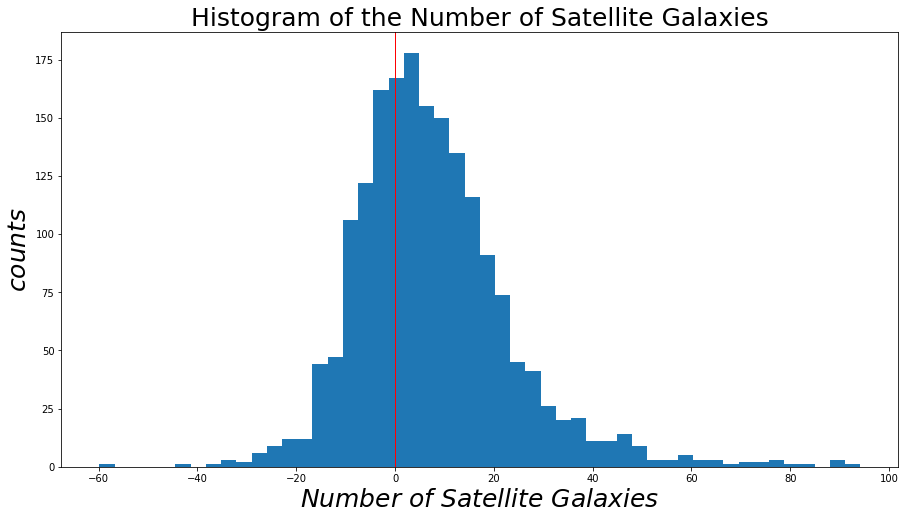

mean number of satellites is 10.15693368639844
median number of satellites is 7.9176832825212955
standard deviation of satellites is 23.83912759843907
standard error is 1.3583603617064905


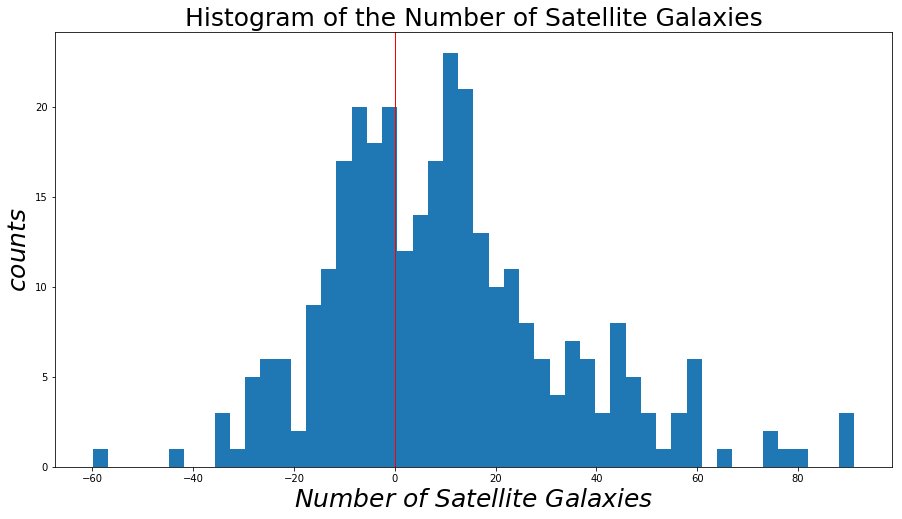

mean number of satellites is 7.863676605715905
median number of satellites is 5.122301542573888
standard deviation of satellites is 16.22028243291223
standard error is 0.6535338033709069


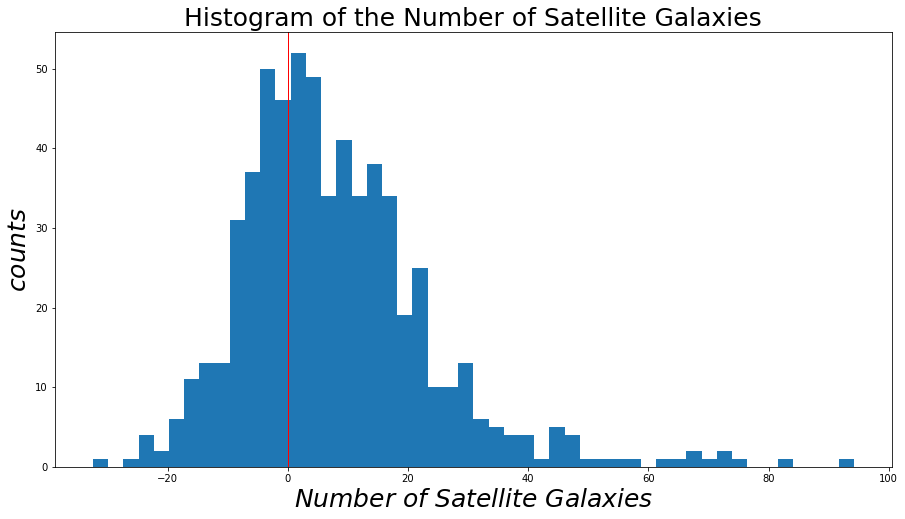

mean number of satellites is 6.689566404623265
median number of satellites is 5.525167002699297
standard deviation of satellites is 11.952538082875956
standard error is 0.39930627150437203


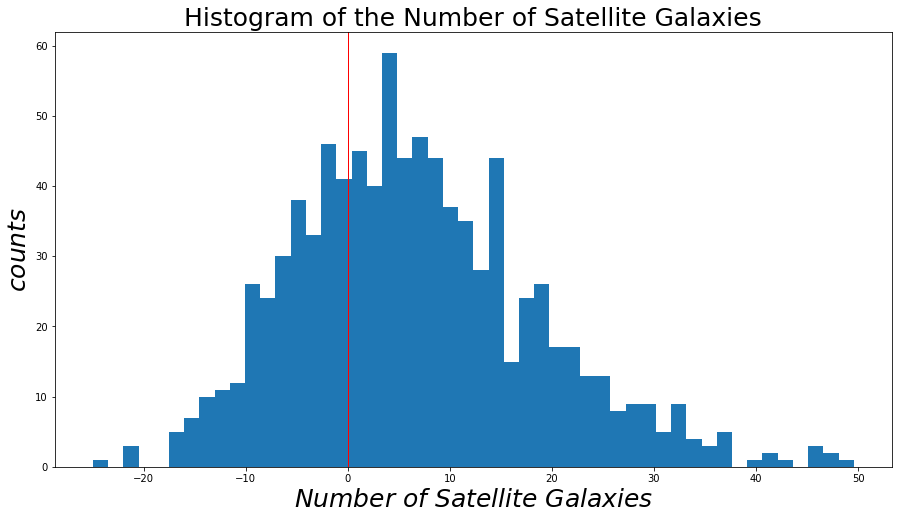

In [3]:
totalNsat(Nsat_total)
plt.show()

totalNsat(Nsat35)
plt.show()

totalNsat(Nsat05)
plt.show()

totalNsat(Nsat65)
plt.show()

In [4]:
# read in selection matrices

# lowz
smatrix_low = np.load('/Users/mtownsend/Desktop/lowz_smatrix-1matrices-EDR.npz')
low_smatrix = smatrix_low['smatrix']
smatrix_low35 = low_smatrix[0]
# print(smatrix_low35.shape)

# print()
# print()

# midz
smatrix_mid = np.load('/Users/mtownsend/Desktop/midz_smatrix-2matrices-EDR.npz')
mid_smatrix = smatrix_mid['smatrix']
smatrix_mid35 = mid_smatrix[0]
smatrix_mid05 = mid_smatrix[1]
# print(smatrix_mid35.shape)
# print(smatrix_mid05.shape)

# print()
# print()

# highz
smatrix_high = np.load('/Users/mtownsend/Desktop/highz_smatrix-3matrices-EDR.npz')
high_smatrix = smatrix_high['smatrix']
smatrix_high35 = high_smatrix[0]
smatrix_high05 = high_smatrix[1]
smatrix_high65 = high_smatrix[2]
# print(smatrix_high35.shape)
# print(smatrix_high05.shape)
# print(smatrix_high65.shape)

In [5]:
# apply masks

# lowz
masked_Nsat_low35 = []
for i in range(len(Nsat35)):
    masked_Nsat_low35.append(Nsat35[i] * smatrix_low35)

print(np.asarray(masked_Nsat_low35).shape)




# midz
masked_Nsat_mid35 = []
for i in range(len(Nsat35)):
    masked_Nsat_mid35.append(Nsat35[i] * smatrix_mid35)
    
print(np.asarray(masked_Nsat_mid35).shape)
    
masked_Nsat_mid05 = []
for i in range(len(Nsat05)):
    masked_Nsat_mid05.append(Nsat05[i] * smatrix_mid05)
    
print(np.asarray(masked_Nsat_mid05).shape)




# highz
masked_Nsat_high35 = []
for i in range(len(Nsat35)):
    masked_Nsat_high35.append(Nsat35[i] * smatrix_high35)
    
print(np.asarray(masked_Nsat_high35).shape)
    
masked_Nsat_high05 = []
for i in range(len(Nsat05)):
    masked_Nsat_high05.append(Nsat05[i] * smatrix_high05)
    
print(np.asarray(masked_Nsat_high05).shape)
    
masked_Nsat_high65 = []
for i in range(len(Nsat65)):
    masked_Nsat_high65.append(Nsat65[i] * smatrix_high65)
    
print(np.asarray(masked_Nsat_high65).shape)

(309, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)


In [6]:

# lowz
# masked_Nsat_low35 = Nsat_bin1_new * low_smatrix35

np.savez('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_low-EDR.npz', masked_Nsat_low35=masked_Nsat_low35)
data_Nsat_low = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_low-EDR.npz')
Nsat35_low_new = data_Nsat_low['masked_Nsat_low35']

# midz
# masked_Nsat_mid35 = Nsat_bin1_new * mid_smatrix35
# masked_Nsat_mid05 = Nsat_bin2_new * mid_smatrix05

np.savez('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_mid-EDR.npz', masked_Nsat_mid35=masked_Nsat_mid35, masked_Nsat_mid05=masked_Nsat_mid05)
data_Nsat_mid = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_mid-EDR.npz')
Nsat35_mid_new = data_Nsat_mid['masked_Nsat_mid35']
Nsat05_mid_new = data_Nsat_mid['masked_Nsat_mid05']

# highz
# masked_Nsat_high35 = Nsat_bin1_new * high_smatrix35
# masked_Nsat_high05 = Nsat_bin2_new * high_smatrix05
# masked_Nsat_high65 = Nsat_bin3_new * high_smatrix65

np.savez('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_high-EDR.npz', masked_Nsat_high35=masked_Nsat_high35, masked_Nsat_high05=masked_Nsat_high05, masked_Nsat_high65=masked_Nsat_high65)
data_Nsat_high = np.load('/Users/mtownsend/Documents/LRG_Data/masked_Nsat_high-EDR.npz')
Nsat35_high_new = data_Nsat_high['masked_Nsat_high35']
Nsat05_high_new = data_Nsat_high['masked_Nsat_high05']
Nsat65_high_new = data_Nsat_high['masked_Nsat_high65']




mean number of satellites is 2.8394692837275963
median number of satellites is 1.3244125342149
standard deviation of satellites is 6.1367302625748295
standard error is 0.3496726591501665


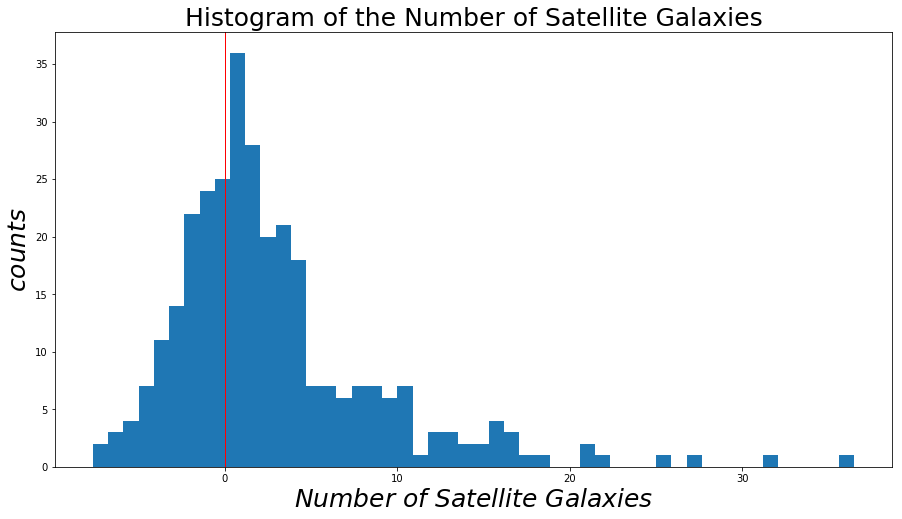

mean number of satellites is 1.803451425951498
median number of satellites is 0.8963737889265829
standard deviation of satellites is 4.035096418536013
standard error is 0.22992095696329223


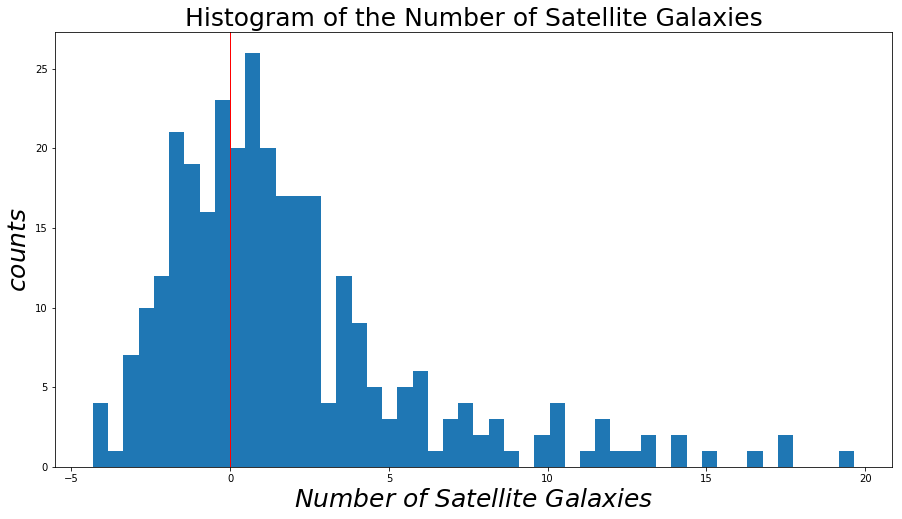

mean number of satellites is 1.2164376812463946
median number of satellites is 0.49930675983702844
standard deviation of satellites is 3.8651461156505147
standard error is 0.15573117496523417


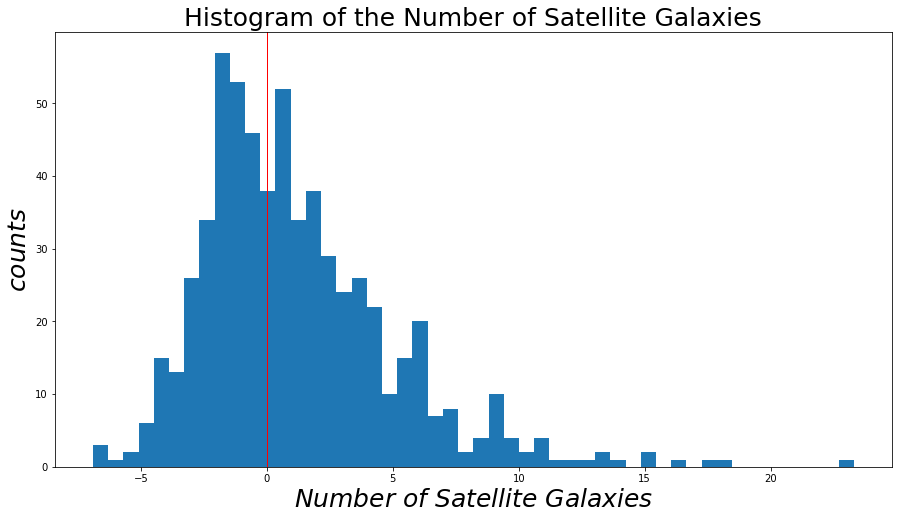

mean number of satellites is 0.6033217011060147
median number of satellites is 0.11811471627479905
standard deviation of satellites is 2.08813498364811
standard error is 0.11898253323103762


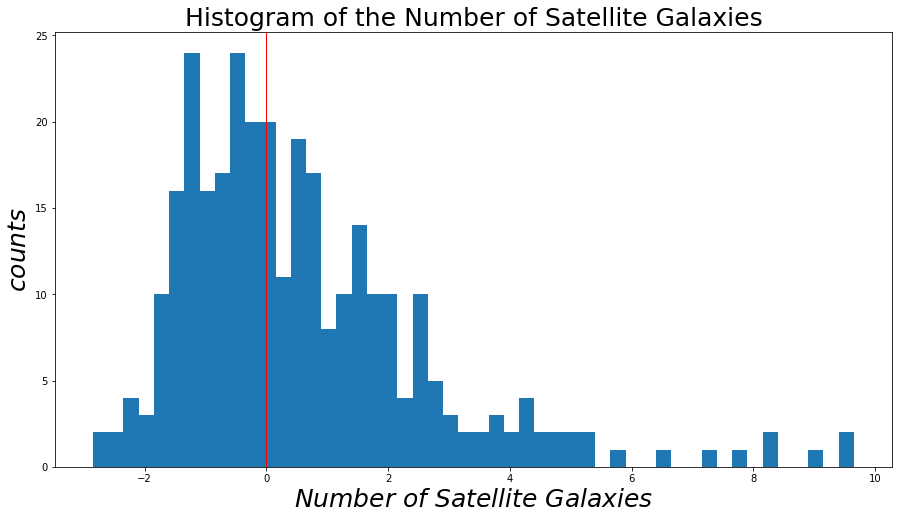

mean number of satellites is 0.4499248398030621
median number of satellites is 0.08013837366844889
standard deviation of satellites is 2.4372307865665728
standard error is 0.09819882682224924


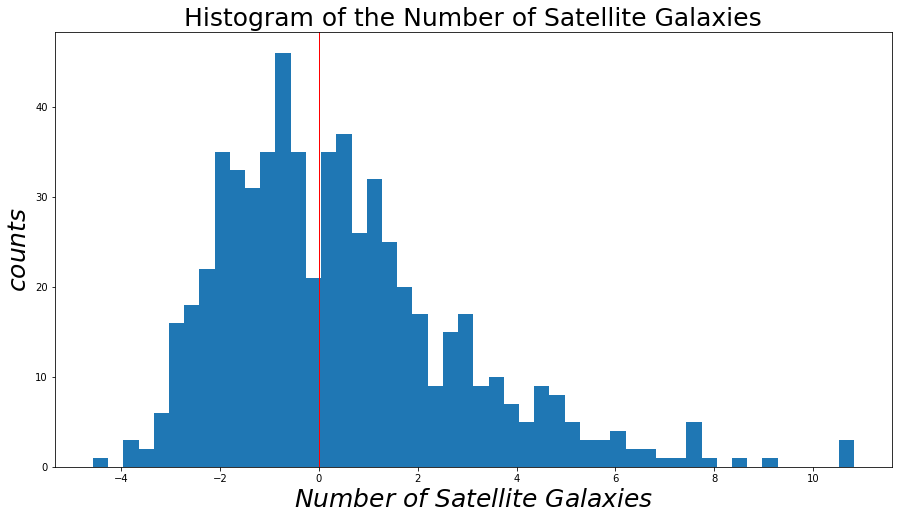

mean number of satellites is 1.3902609791520684
median number of satellites is 0.7827802743671133
standard deviation of satellites is 3.9324199454944506
standard error is 0.13137292979425438


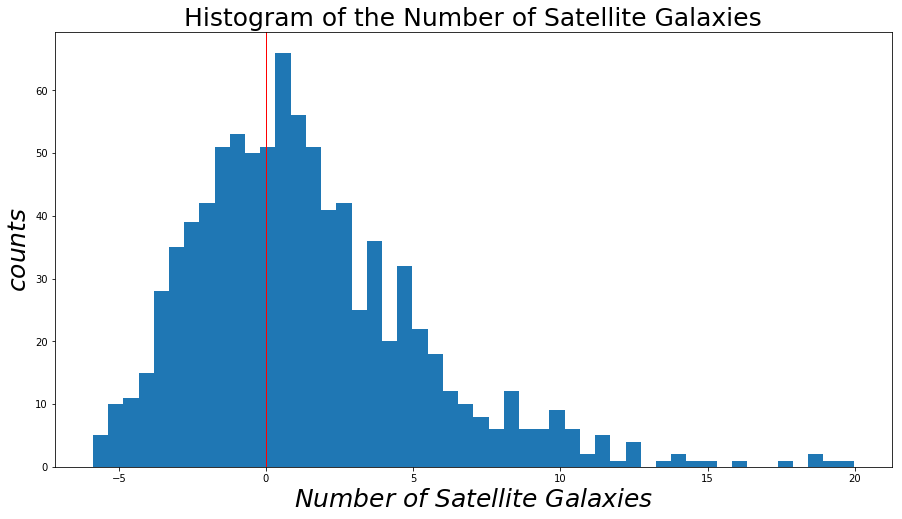

In [7]:
totalNsat(masked_Nsat_low35)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/29April2021/Nsat_masked_low35.pdf')
plt.show()

totalNsat(masked_Nsat_mid35)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/29April2021/Nsat_masked_mid35.pdf')
plt.show()

totalNsat(masked_Nsat_mid05)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/29April2021/Nsat_masked_mid05.pdf')
plt.show()

totalNsat(masked_Nsat_high35)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/29April2021/Nsat_masked_high35.pdf')
plt.show()

totalNsat(masked_Nsat_high05)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/29April2021/Nsat_masked_high05.pdf')
plt.show()

totalNsat(masked_Nsat_high65)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/29April2021/Nsat_masked_high65.pdf')
plt.show()